# Aufgabe 32

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pp

def vector(*elems): return np.array([list(elems)]).T

## a) Übergangsmatrix

In [2]:
P = np.matrix([[0.5, 0.5 , 0   ],
              [0  , 0.25, 0.75],
              [0.5, 0   , 0.5 ]])

assert np.all(P.sum(axis=1) == 1.0)  # stoch. Matrix

## b) Zustandsverteilung

In [3]:
pn = vector(0.5, 0.25, 0.25)  # Verteilung zum Zeitpunkt n
pn2 = (  pn.T * P**2  ).T     # Verteilung zwei Schritte weiter
pn2.T

matrix([[ 0.34375 ,  0.265625,  0.390625]])

In [4]:
vector(1, 0, 1).T @ pn2  # nicht Zustand 2 (hier index 1)

matrix([[ 0.734375]])

## d) stationäre Verteilung $\vec{p}$

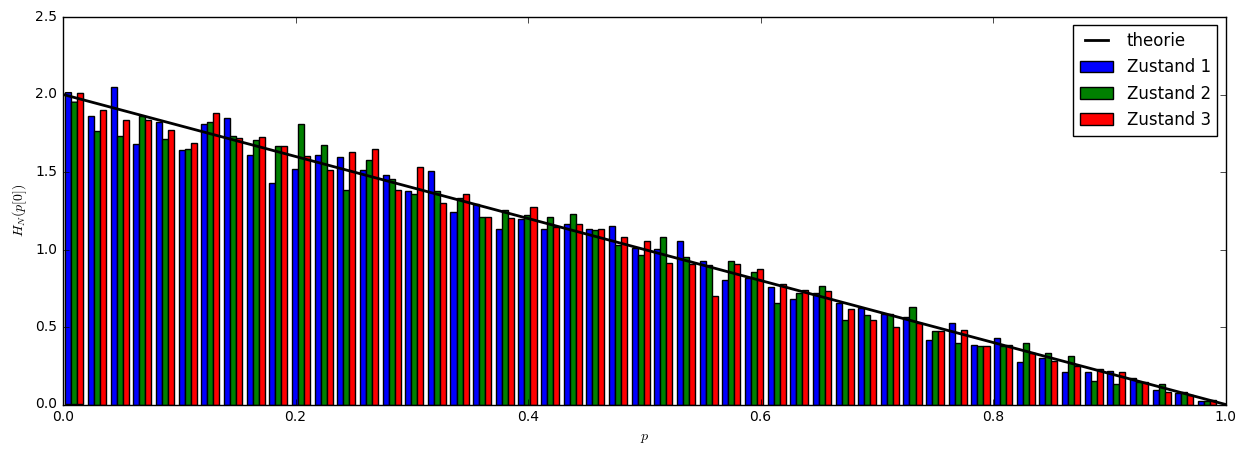

In [5]:
N = 10000  # Anzahl zufälliger Anfangsverteilungen
p1 = 1 - np.sqrt(1 - np.random.sample(N))  # Dichte: f(p1) = 2(1-p1), 0<p1<1
p2 = (1 - p1) * np.random.sample(N)        # bed Dichte: f(p2|p1) = 1/(1-p1), 0<p2<1-p1
p3 = 1 - p1 - p2                           # determistisch, wenn p1, p2 gegeben.

pt0 = np.vstack((p1, p2, p3)).T
assert np.all(pt0 >= 0) and np.all(abs(pt0.sum(1) - 1) < 1e-3)  # stoch. Vektoren

pp.figure(figsize=(15, 5))
pp.hist(pt0, bins=51, normed=True)
pt = np.linspace(0, 1, 51); pp.plot(pt, 2 * (1 - pt), 'k', linewidth=2)
pp.xlabel(r'$p$'); pp.ylabel(r'$H_N(p[0])$'); 
pp.legend(['theorie'] + ['Zustand {}'.format(i) for i in (1,2,3)]);

p  = [0.375, 0.25, 0.375].T


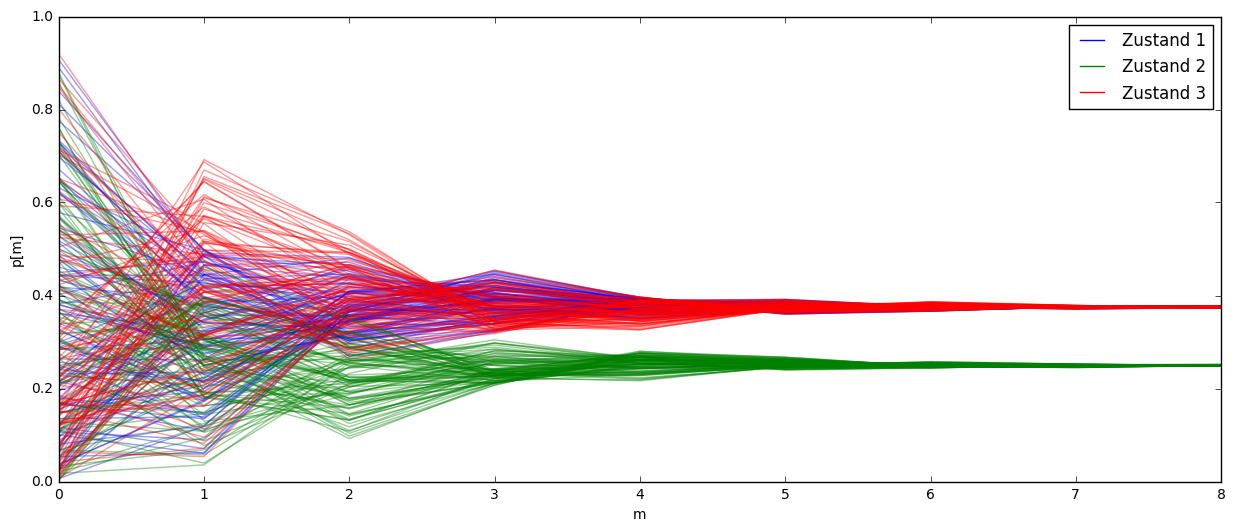

In [6]:
M, N = 20, 100  # Schritte, zuf. Anfänge
p = np.empty((M, N, 3)); p[0] = pt0[:N]

for i in range(1, M):
    p[i] = p[i-1] @ P  # Zustandsverteilung für M Schritte rekursiv berechnen

print('p  = {}.T'.format(p[-1].mean(0).round(4).tolist()))
    
pp.figure(figsize=(15, 6))
pp.plot(0, 'b'); pp.plot(0, 'g'); pp.plot(0, 'r')  # dummys für Legende
for i, c in enumerate(('b', 'g', 'r')):
    pp.plot(p[..., i], color=c, alpha=0.4);    
pp.xlabel('m'); pp.ylabel('p[m]'); pp.xlim(0, 8); pp.ylim(0, 1)
pp.legend(['Zustand {}'.format(i) for i in (1,2,3)]);